In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# LSTM_AT_PPT

In [5]:
def format_number_with_zeros(number):
    # Use string formatting to add leading zeros
    formatted_number = f"{number:03d}"
    return formatted_number

In [12]:
# plot the validation loss for 30 epochs for pretraining
# lstm_531_PPT_AT_pretrained_0111_105508
# validation_end_date: 30/09/1989
# validation_start_date: 01/10/1980

def plot_validation_loss_during_train(folder_path,
                                     epoch_n = 30,
                                     metric = 'median'):
    metric_lst = []

    for i in range(1, epoch_n+1):
        formatted_number = format_number_with_zeros(i)
        path = f"{folder_path}/validation/model_epoch{formatted_number}/validation_metrics.csv"
        valid_result_df = pd.read_csv(path)
        #print(valid_result_df.head())
        
        if metric=='median':
            for col in valid_result_df.columns:
                if 'NSE' in col:
                    metric_value = valid_result_df[col].median()
                    break
        
        elif metric=='mean':
            for col in valid_result_df.columns:
                if 'NSE' in col:
                    metric_value = valid_result_df[col].mean()
                    break
        
        metric_lst.append(metric_value)
    #print(metric_lst)

    # do the plotting
    sns.set(style="whitegrid")  # Set the style of the plot (optional)
    data = pd.DataFrame({'epoch_n': np.arange(len(metric_lst)) , metric: metric_lst})

    # Create the line plot
    sns.lineplot(data=data, x='epoch_n', y=metric)

    # Add labels and a title
    plt.xlabel('Epoch n')
    
    plt.ylabel(metric)
    
    plt.title(f'Training result on validation data')
    #plt.ylim(0.5,0.6)
    # Show the plot
    plt.show()

    
def plot_test_NSE_dist(folder_path):
    # check the nse result on the last epoch
    test_result_df = pd.read_csv(f"{folder_path}/test/model_epoch030/test_metrics.csv")
    nse_last_epoch = test_result_df['NSE'].values
    nse_last_epoch_median = test_result_df['NSE'].median()
    lower_bound = -1
    upper_bound = 1
    data_within_bounds = nse_last_epoch[(nse_last_epoch >= lower_bound) & (nse_last_epoch <= upper_bound)]
    sns.kdeplot(data_within_bounds)
    print(len(data_within_bounds)/len(nse_last_epoch))
    plt.xlabel('NSE')
    plt.title(f'Test data NSE on epoch 30 , \n{len(data_within_bounds)} watersheds are shown with NSE>-1, the median is {round(nse_last_epoch_median,2)}')



## Check pretraining results

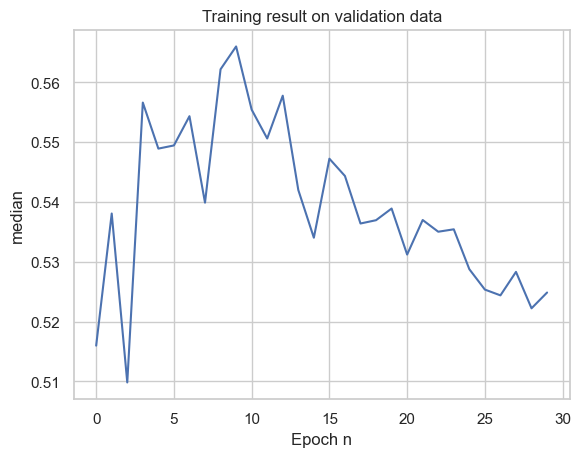

In [20]:
exp =  'LSTM_AT_PPT'
base_dir = os.getcwd().rsplit('/',1)[0]
folder_name = 'lstm_531_PPT_AT_pretrained_0211_162102'

plot_validation_loss_during_train(folder_path = f'{base_dir}/experiments/{exp}/runs/{folder_name}')
#plot_test_NSE_dist(folder_path = f'{base_dir}/experiments/{exp}/runs/{folder_name}')


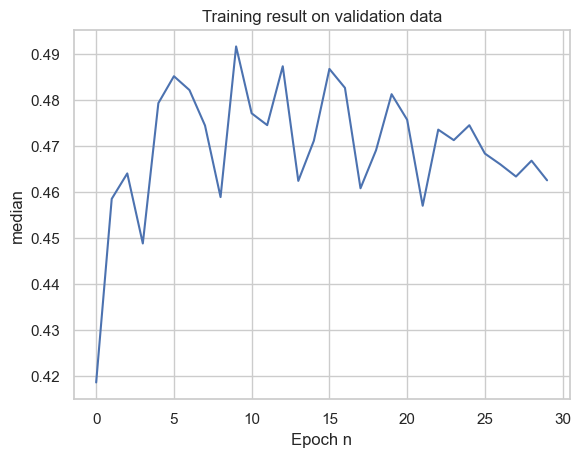

In [21]:
exp =  'LSTM_ET_PPT'
base_dir = os.getcwd().rsplit('/',1)[0]
folder_name = 'lstm_531_PPT_ET_pretrained_0211_165839'

plot_validation_loss_during_train(folder_path = f'{base_dir}/experiments/{exp}/runs/{folder_name}')
#plot_test_NSE_dist(folder_path = f'{base_dir}/experiments/{exp}/runs/{folder_name}')


In [22]:
exp =  'PILSTM_PPT_AT_1out'
base_dir = os.getcwd().rsplit('/',1)[0]
folder_name = 'pretrain_camels_pilstm_ppt_at_1out_1611_121341'

plot_validation_loss_during_train(folder_path = f'{base_dir}/experiments/{exp}/runs/{folder_name}')
#plot_test_NSE_dist(folder_path = f'{base_dir}/experiments/{exp}/runs/{folder_name}')


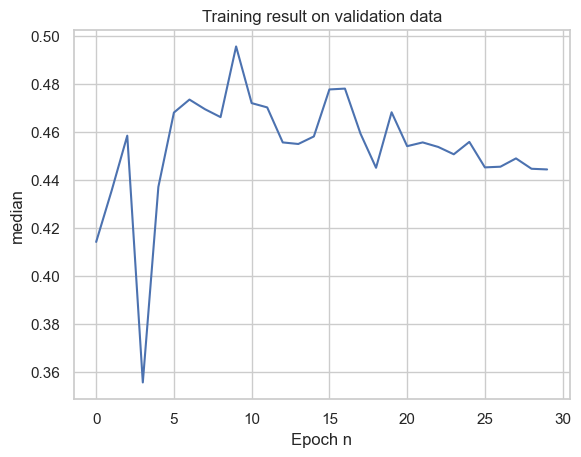

In [23]:
exp =  'PILSTM_PPT_ET_1out'
base_dir = os.getcwd().rsplit('/',1)[0]
folder_name = 'pretrain_camels_pilstm_1out_1211_182813'

plot_validation_loss_during_train(folder_path = f'{base_dir}/experiments/{exp}/runs/{folder_name}')
#plot_test_NSE_dist(folder_path = f'{base_dir}/experiments/{exp}/runs/{folder_name}')


## Check finetuning results

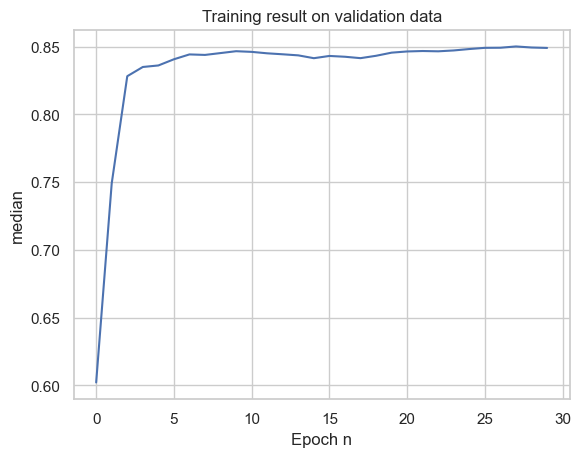

In [24]:
# check finetuning results
exp =  'LSTM_AT_PPT'
base_dir = os.getcwd().rsplit('/',1)[0]
folder_name = 'lstm_531_PPT_AT_finetune_drycreek_None_2006-10-0100_00_00_2012-09-3000_00_00_1711_015254'

plot_validation_loss_during_train(folder_path = f'{base_dir}/experiments/{exp}/runs/base_pretrain_singlerun/{folder_name}')

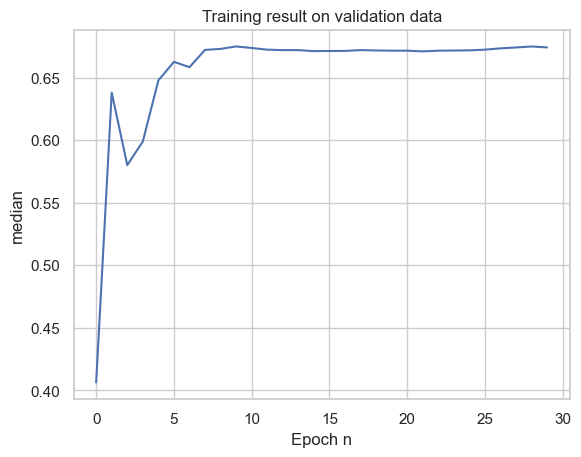

In [27]:
# check finetuning results
exp =  'PILSTM_PPT_ET_1out'
base_dir = os.getcwd().rsplit('/',1)[0]
folder_name = 'pilstm_ppt_et_1out_finetune_harvardforest_0.5_1511_124749'

plot_validation_loss_during_train(folder_path = f'{base_dir}/experiments/{exp}/runs/base_pretrain_singlerun/{folder_name}')